In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("googleplaystore.csv")

In [3]:
data.shape

(10841, 13)

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.size

140933

In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data.drop(['Current Ver'],axis=1,inplace=True)

In [8]:
data.drop(['Rating'],axis=1,inplace=True)

In [9]:
data.isnull().sum()

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Android Ver       3
dtype: int64

In [10]:
data.drop(['Type'],axis=1,inplace=True)

In [11]:
data.drop(['Android Ver'],axis=1,inplace=True)

In [12]:
data.drop(['Content Rating'],axis=1,inplace=True)

In [13]:
data.isnull().sum()

App             0
Category        0
Reviews         0
Size            0
Installs        0
Price           0
Genres          0
Last Updated    0
dtype: int64

In [14]:
data.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [15]:

import pandas as pd

data = pd.read_csv("googleplaystore.csv")


# Define a custom conversion function
def convert_size(size):
    if isinstance(size, float):
        return size  # Return the float value unchanged
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) * 0.001
    elif size == 'Varies with device':
        return None  # or any value that makes sense in your context
    else:
        # Remove commas and plus signs before converting to float
        return float(size.replace(',', '').replace('+', ''))

# Apply the conversion function to the 'Size' column
data['Size'] = data['Size'].apply(convert_size)

# Drop rows where the length of Size is greater than 4
data.drop(data[data['Size'].astype(str).str.len() > 4].index, inplace=True)


In [16]:
print(data.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159  19.0      10,000+  Free     0       Everyone   
1     967  14.0     500,000+  Free     0       Everyone   
2   87510   8.7   5,000,000+  Free     0       Everyone   
3  215644  25.0  50,000,000+  Free     0           Teen   
4     967   2.8     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10538 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10538 non-null  object 
 1   Category        10538 non-null  object 
 2   Rating          9119 non-null   float64
 3   Reviews         10538 non-null  object 
 4   Size            8843 non-null   float64
 5   Installs        10538 non-null  object 
 6   Type            10537 non-null  object 
 7   Price           10538 non-null  object 
 8   Content Rating  10538 non-null  object 
 9   Genres          10538 non-null  object 
 10  Last Updated    10538 non-null  object 
 11  Current Ver     10534 non-null  object 
 12  Android Ver     10536 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [18]:
data.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10538, dtype: object

In [19]:
data.Reviews.astype(float) # task 4.2 completed

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10538, dtype: float64

In [20]:
###Installs field is currently stored as string and has values like 1,000,000+. 
####1)Treat 1,000,000+ as 1,000,000    2) remove ‘+’, ‘,’ from the field, convert it to integer

In [21]:
data.Installs.str.replace('[,+]','').astype(float)

/tmp/ipykernel_187/1856641872.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.Installs.str.replace('[,+]','').astype(float)


0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10538, dtype: float64

In [22]:
###Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [23]:
data.Price.str.replace('$','').astype(float)

/tmp/ipykernel_187/1466606.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.Price.str.replace('$','').astype(float)


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10538, dtype: float64

In [24]:
###Sanity checks:Average rating should be between 1 and 5 as only these values are allowed on the play store.
###Drop the rows that have a value outside this range.

In [25]:
data.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10538, dtype: float64

In [26]:
data= data[(data['Rating']>=1) & (data['Rating']<=5)]

In [27]:
## we can also use data = data.drop(data[(data['Rating'] < 1) | (data['Rating'] > 5)].index)

In [28]:
data = data.drop(data[(data['Rating'] < 1) | (data['Rating'] > 5)].index)

In [29]:
data.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9119, dtype: float64

In [30]:
###Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.


In [31]:
data= data[data['Reviews']<=data['Installs']]

In [32]:
### we can also use data.drop(data[data['Reviews'] > data['Installs']].index, inplace=True)

In [33]:
data.Reviews

3        215644
5           167
6           178
16         3632
18       194216
          ...  
10791      1287
10793     28510
10800       174
10827       117
10836        38
Name: Reviews, Length: 1945, dtype: object

In [34]:
###For free apps (type = “Free”), the price should not be >0. Drop any such rows

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 3 to 10836
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1945 non-null   object 
 1   Category        1945 non-null   object 
 2   Rating          1945 non-null   float64
 3   Reviews         1945 non-null   object 
 4   Size            1627 non-null   float64
 5   Installs        1945 non-null   object 
 6   Type            1945 non-null   object 
 7   Price           1945 non-null   object 
 8   Content Rating  1945 non-null   object 
 9   Genres          1945 non-null   object 
 10  Last Updated    1945 non-null   object 
 11  Current Ver     1943 non-null   object 
 12  Android Ver     1945 non-null   object 
dtypes: float64(2), object(11)
memory usage: 212.7+ KB


In [36]:
data= data.drop(data[(data['Type']== 'Free')&(data['Price']!= '0' )].index)

In [37]:

# Assuming 'column_name' is the name of the column you want to search
word_to_find = 'Free'
result = data[data['Price'].str.contains(word_to_find, case=False, na=False)]
result

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [38]:
###Performing univariate analysis: 

In [39]:
#Boxplot for Price Are there any outliers? Think about the price of usual apps on Play Store.

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns

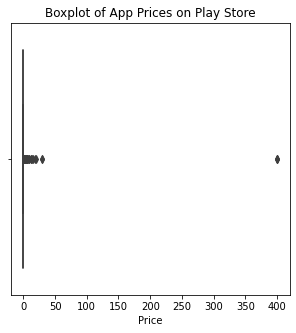

In [41]:

data['Price'] = data['Price'].replace('[\$,]', '', regex=True).astype(float)
# Create a boxplot for the 'Price' column
plt.figure(figsize=(5,5))
sns.boxplot(x=data['Price'])

# Set plot labels and title
plt.xlabel('Price')
plt.title('Boxplot of App Prices on Play Store')

# Display the plot
plt.show()

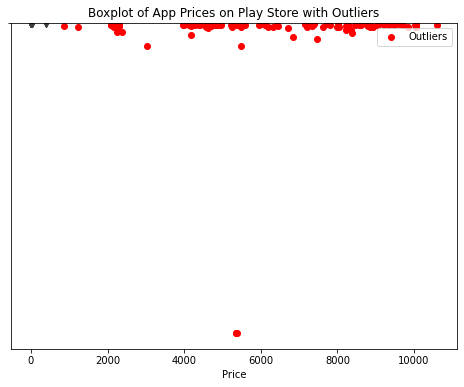

In [42]:
# Calculate the interquartile range (IQR) for 'Price'
Q1 = data['Price'].quantile(0.2)
Q3 = data['Price'].quantile(0.8)
IQR = Q3 - Q1

# Define the upper and lower bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]

# Create a boxplot for the 'Price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Price'])

# Mark the identified outliers on the boxplot
plt.scatter(outliers.index, outliers['Price'], color='red', label='Outliers')

# Set plot labels and title
plt.xlabel('Price')
plt.title('Boxplot of App Prices on Play Store with Outliers')

# Display the plot
plt.legend()
plt.show()

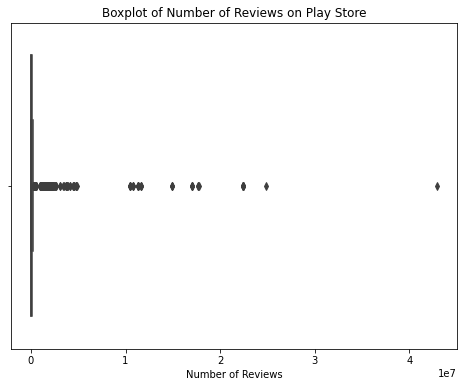

In [43]:
data['Reviews'] = data['Reviews'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the interquartile range (IQR) for 
Q1 = data['Reviews'].quantile(0.2)
Q3 = data['Reviews'].quantile(0.8)
IQR = Q3 - Q1

# Define the upper and lower bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Reviews'] < lower_bound) | (data['Reviews'] > upper_bound)]


# Create a boxplot for the 'Reviews' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Reviews'])

# Set plot labels and title
plt.xlabel('Number of Reviews')
plt.title('Boxplot of Number of Reviews on Play Store')

# Display the plot
plt.show()

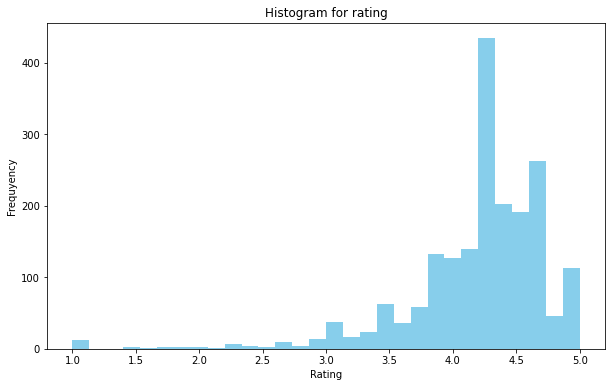

In [44]:
data['Rating'] = data['Rating'].replace('[\$,]', '', regex=True).astype(float)


plt.figure(figsize=(10,6))
plt.hist(data['Rating'], bins=30 , color='skyblue')


plt.xlabel('Rating')
plt.ylabel('Frequyency')
plt.title('Histogram for rating')

plt.show()


In [45]:
##Histogram for Size

###Note down your observations for the plots made above. Which of these seem to have outliers?

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 3 to 10836
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1945 non-null   object 
 1   Category        1945 non-null   object 
 2   Rating          1945 non-null   float64
 3   Reviews         1945 non-null   float64
 4   Size            1627 non-null   float64
 5   Installs        1945 non-null   object 
 6   Type            1945 non-null   object 
 7   Price           1945 non-null   float64
 8   Content Rating  1945 non-null   object 
 9   Genres          1945 non-null   object 
 10  Last Updated    1945 non-null   object 
 11  Current Ver     1943 non-null   object 
 12  Android Ver     1945 non-null   object 
dtypes: float64(4), object(9)
memory usage: 212.7+ KB


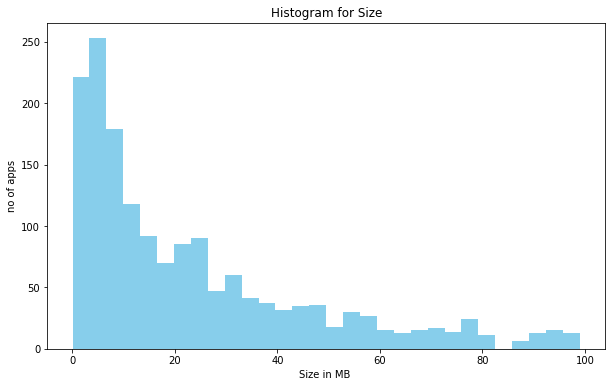

In [47]:
plt.figure(figsize=(10,6))
plt.hist(data['Size'], bins=30 , color='skyblue')


plt.xlabel('Size in MB ')
plt.ylabel('no of apps')
plt.title('Histogram for Size')

plt.show()


In [48]:
# Display records with very high prices (e.g., $200)
high_price_records = data[data['Price']> 200]
print(high_price_records)


                    App Category  Rating  Reviews  Size Installs  Type  \
5356  I Am Rich Premium  FINANCE     4.1   1867.0   4.7  50,000+  Paid   
5362      I Am Rich Pro   FAMILY     4.4    201.0   2.7   5,000+  Paid   
5369          I am Rich  FINANCE     4.3    180.0   3.8   5,000+  Paid   

       Price Content Rating         Genres       Last Updated Current Ver  \
5356  399.99       Everyone        Finance  November 12, 2017         1.6   
5362  399.99       Everyone  Entertainment       May 30, 2017        1.54   
5369  399.99       Everyone        Finance     March 22, 2018         1.0   

     Android Ver  
5356  4.0 and up  
5362  1.6 and up  
5369  4.2 and up  


In [49]:
# Drop records with price greater than $200
data = data[data['Price'] <= 200]

data.Price

3        0.0
5        0.0
6        0.0
16       0.0
18       0.0
        ... 
10791    0.0
10793    0.0
10800    0.0
10827    0.0
10836    0.0
Name: Price, Length: 1942, dtype: float64

In [50]:
#Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [51]:
# Display records with very high reviews (e.g., $200)
high_Reviews_records = data[data['Reviews']> 2000000]
print(high_Reviews_records)

                                              App       Category  Rating  \
342                               Viber Messenger  COMMUNICATION     4.3   
347                 imo free video calls and chat  COMMUNICATION     4.3   
371         Google Duo - High Quality Video Calls  COMMUNICATION     4.6   
378   UC Browser - Fast Download Private & Secure  COMMUNICATION     4.5   
383                 imo free video calls and chat  COMMUNICATION     4.3   
...                                           ...            ...     ...   
8261                  MARVEL Contest of Champions           GAME     4.3   
8273                          MARVEL Future Fight         FAMILY     4.6   
8399                          DEER HUNTER CLASSIC           GAME     4.4   
9140                               EA SPORTS UFC®         SPORTS     4.5   
9142                    Need for Speed™ No Limits           GAME     4.4   

         Reviews  Size      Installs  Type  Price Content Rating  \
342   11334799.0   

In [52]:
# Drop records with Reviews greater than 2 million
data = data[data['Reviews'] >= 2000000]


In [53]:
high_Reviews_records 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
342,Viber Messenger,COMMUNICATION,4.3,11334799.0,NaN,"500,000,000+",Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
347,imo free video calls and chat,COMMUNICATION,4.3,4785892.0,11.0,"500,000,000+",Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237.0,NaN,"500,000,000+",Free,0.0,Everyone,Communication,"July 31, 2018",37.1.206017801.DR37_RC14,4.4 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40.0,"500,000,000+",Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988.0,11.0,"500,000,000+",Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8261,MARVEL Contest of Champions,GAME,4.3,2468915.0,92.0,"50,000,000+",Free,0.0,Teen,Action,"July 30, 2018",19.1.0,4.0.3 and up
8273,MARVEL Future Fight,FAMILY,4.6,2354042.0,72.0,"50,000,000+",Free,0.0,Everyone 10+,Role Playing,"July 3, 2018",4.2.0,4.0.3 and up
8399,DEER HUNTER CLASSIC,GAME,4.4,3941129.0,77.0,"50,000,000+",Free,0.0,Teen,Action,"July 16, 2018",3.12.0,3.0 and up
9140,EA SPORTS UFC®,SPORTS,4.5,2371338.0,37.0,"50,000,000+",Free,0.0,Teen,Sports,"July 24, 2017",1.9.3097721,2.3.3 and up


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 342 to 9142
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             83 non-null     object 
 1   Category        83 non-null     object 
 2   Rating          83 non-null     float64
 3   Reviews         83 non-null     float64
 4   Size            47 non-null     float64
 5   Installs        83 non-null     object 
 6   Type            83 non-null     object 
 7   Price           83 non-null     float64
 8   Content Rating  83 non-null     object 
 9   Genres          83 non-null     object 
 10  Last Updated    83 non-null     object 
 11  Current Ver     83 non-null     object 
 12  Android Ver     83 non-null     object 
dtypes: float64(4), object(9)
memory usage: 9.1+ KB


In [ ]:
#Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. 
#Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

In [ ]:
#Make scatter plot/joinplot for Rating vs. Price

#What pattern do you observe? Does rating increase with price?

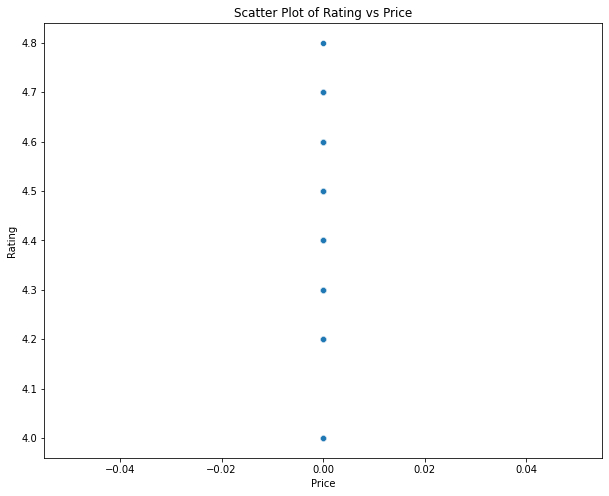

In [57]:
plt.figure(figsize=(10,8))

sns.scatterplot(x='Price', y='Rating', data=data)
plt.title('Scatter Plot of Rating vs Price')
plt.show()

In [ ]:
# Observations : Rating Remains same with the price as price is Zero all are free 

In [ ]:
#Make scatter plot/joinplot for Rating vs. Size

##Are heavier apps rated better?

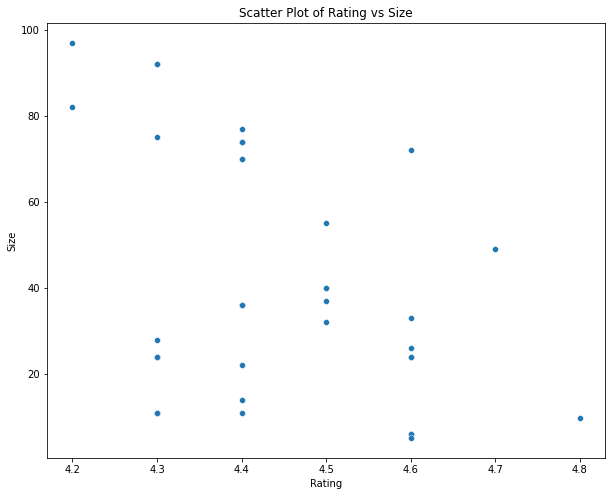

In [59]:
plt.figure(figsize=(10,8))

sns.scatterplot(x='Rating', y='Size', data=data)
plt.title('Scatter Plot of Rating vs Size')
plt.show()

In [ ]:
# Observations :  here lesser the size more the rating

In [ ]:
##Make scatter plot/joinplot for Rating vs. Reviews

##Does more review mean a better rating always?


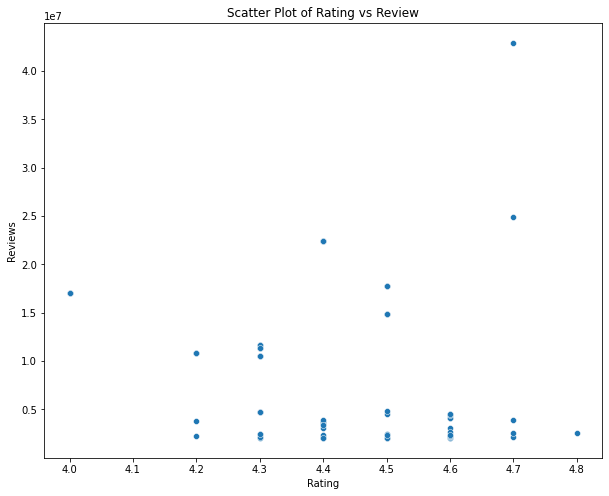

In [61]:
plt.figure(figsize=(10,8))

sns.scatterplot(x='Rating', y='Reviews', data=data)
plt.title('Scatter Plot of Rating vs Review')
plt.show()

In [ ]:
# Observations :  more Review doesent mean better Rating always

In [ ]:
#Make boxplot for Rating vs. Content Rating

#Is there any difference in the ratings? Are some types liked better?

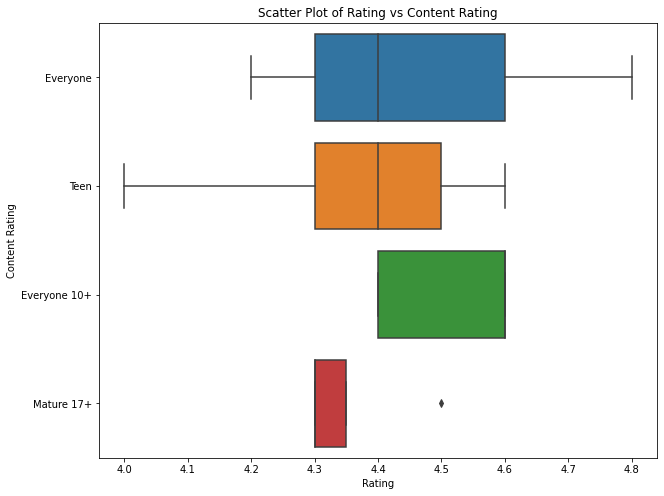

In [62]:
plt.figure(figsize=(10,8))

sns.boxplot(x='Rating', y='Content Rating', data=data)
plt.title('Scatter Plot of Rating vs Content Rating')
plt.show()

In [ ]:
## Observations :  Everyones content is liked better

In [ ]:
##Make boxplot for Ratings vs. Category

##Which genre has the best ratings?

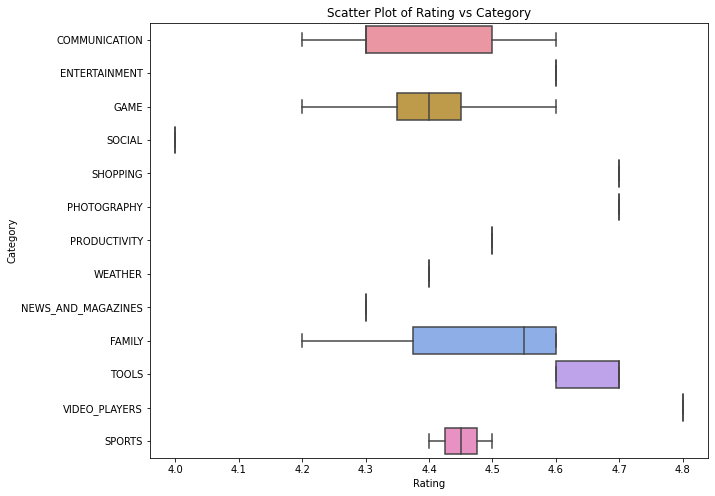

In [65]:
plt.figure(figsize=(10,8))

sns.boxplot(x='Rating', y='Category', data=data)
plt.title('Scatter Plot of Rating vs Category')
plt.show()

In [ ]:
## Observations : TOOLS and videoplayers has the best rating

In [66]:
###8. Data preprocessing

In [74]:
inp1=data.copy()

import numpy as np
inp1['Installs'] = pd.to_numeric(inp1['Installs'], errors='coerce')


inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])


In [ ]:
##Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [75]:
inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

In [77]:
inp2=pd.get_dummies(inp1,columns=['Category', 'Genres', 'Content Rating'],drop_first=True)

In [ ]:
##. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [79]:
from sklearn.model_selection import train_test_split

# Assuming your target variable is 'Rating'
X = inp2.drop('Rating', axis=1)
y = inp2['Rating']

df_train, df_test = train_test_split(inp2, test_size=0.3, random_state=42)

In [ ]:
# Separate the dataframes into X_train, y_train, X_test, and y_test.

In [80]:
X_train = df_train.drop('Rating', axis=1)
y_train = df_train['Rating']

X_test = df_test.drop('Rating', axis=1)
y_test = df_test['Rating']

In [ ]:
#Model building

#Use linear regression as the technique

#Report the R2 on the train set

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming X_train, y_train, X_test, and y_test are already defined

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with the ColumnTransformer and the Linear Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', LinearRegression())])

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training set and calculate R2
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Print R2 on the training set
print(f'R2 on the train set: {r2_train:.4f}')

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate R2 on the test set
r2_test = r2_score(y_test, y_test_pred)

# Print R2 on the test set
print(f'R2 on the test set: {r2_test:.4f}')

R2 on the train set: 0.2229
R2 on the test set: -0.1270


In [85]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate R2 on the test set
r2_test = r2_score(y_test, y_test_pred)

# Print R2 on the test set
print(f'R2 on the test set: {r2_test:.4f}')

R2 on the test set: -0.1270
